# Lab Eval 2

Student: Daniele Avolio 1111559


# 1. Color masking

1.1) Loading and color space

In [103]:
import cv2
import matplotlib.pyplot as plt

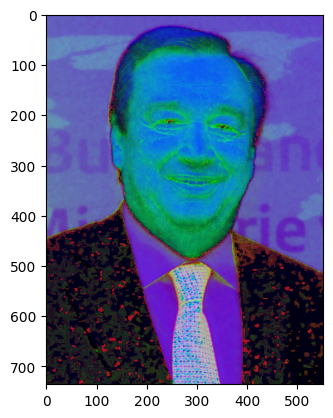

In [104]:
guterres = cv2.imread("guterres-1.jpg")
hsv_guterres = cv2.cvtColor(guterres, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_guterres)

plt.show()


1.2) Mask identifying skin region of the image

Using this:

![circle](https://i.imgur.com/3XIEWuW.png)

Using this I select the correct color range for the skin region.

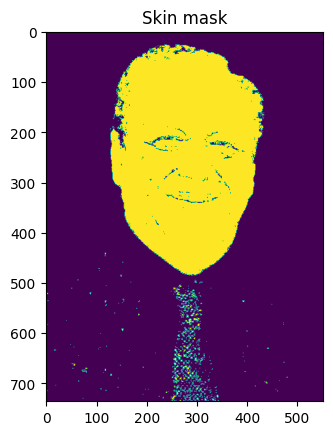

In [105]:
# I can identify the region of colors that I want to highlit
min_region = (0, 15, 0)
max_region = (17, 190, 255)

mask = cv2.inRange(hsv_guterres, min_region, max_region)

plt.imshow(mask)
plt.title("Skin mask")
plt.show()


1.3) Application of the mask

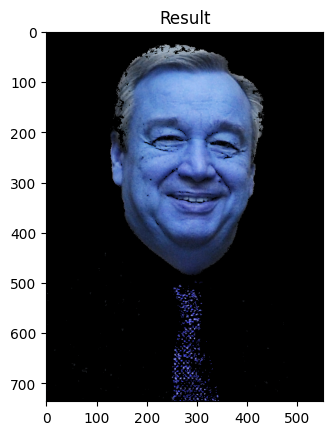

In [114]:
# Mask application
result = cv2.bitwise_and(guterres, guterres, mask=mask)

plt.imshow(result)
plt.title("Result")
plt.show()


2.4) Comparisons

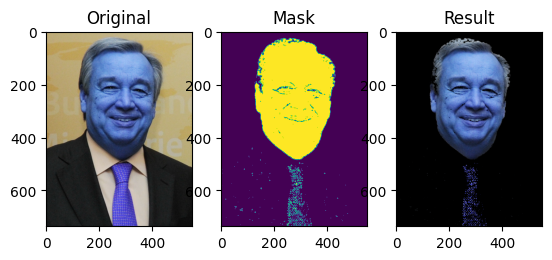

In [107]:
# just some code to make it look more clean
images = [guterres, mask, result]
labels = ["Original", "Mask", "Result"]

for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(labels[i])
    plt.imshow(images[i])

plt.show()


I treid to tweak the mask to get the best result, like trying to not getting the tie, but it was not so easy since the colors are very similar.
So, at the end I decided to leave the values of:

- Minimum: [0,15,0]
- Maximum: [20,190,255]

# 2 - Contrast stretching

2.1) Image load and plot

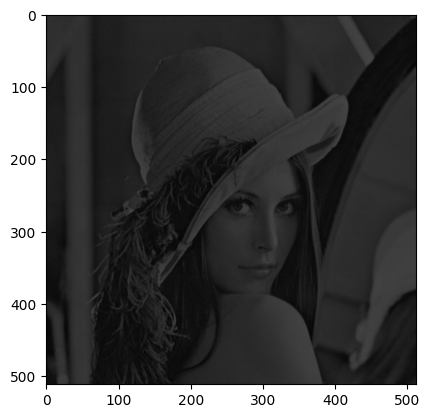

In [108]:
lena = cv2.imread("lena_dark.jpg")

plt.imshow(lena, clim=(0, 255)) #to show all the range
plt.show()

2.2) Histogram

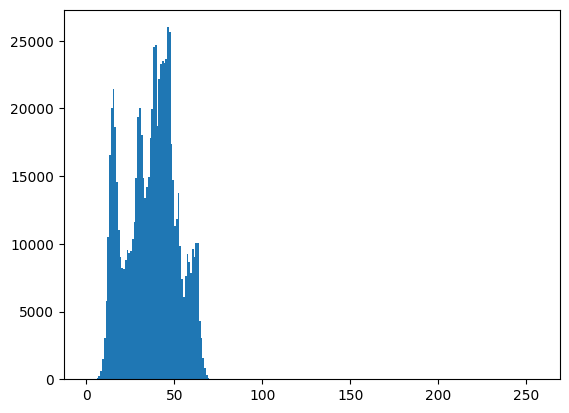

In [109]:
plt.hist(lena.ravel(), 256, [0, 256])
plt.show()

It's notable that the histogram is not well distributed since the majority of the pixels have lower intensity values.

2.3) Pointwise intensity transformation and 2.4) Plot 

I will do a constrast stretching

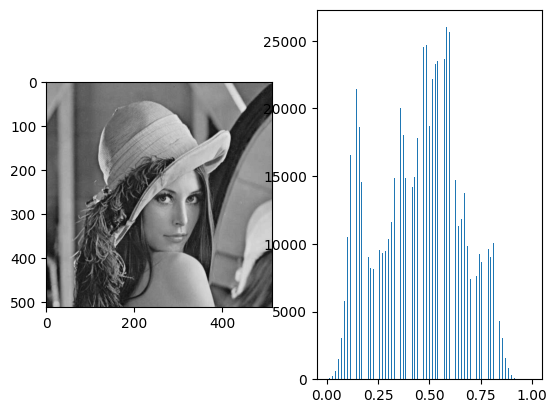

In [110]:
# I need both max and min values
min_val = lena.min()
max_val = lena.max()

# now i need to normalize
lena_norm = (lena - min_val) / (max_val - min_val)

plt.subplot(1, 2, 1)
plt.imshow(lena_norm, clim=(0, 1))

plt.subplot(1, 2, 2)
plt.hist(lena_norm.ravel(), 256, [0, 1]) # here i put 0 1 because I have normalized 
plt.show()


The image has a better histogram after the constrast stretching

2.5) Discuss and show

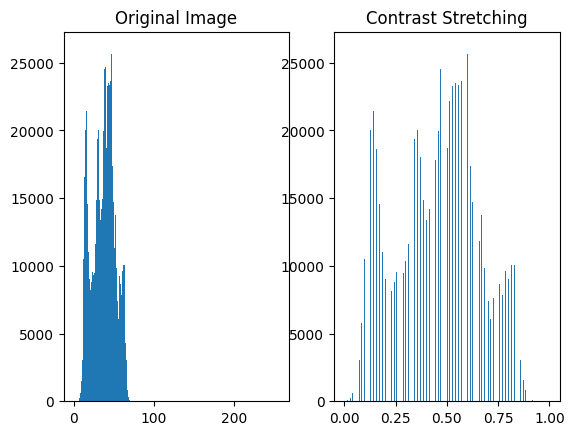

In [111]:
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.hist(lena.ravel(), 256, [0, 256])

plt.subplot(1, 2, 2)
plt.title("Contrast Stretching")
plt.hist(lena_norm.ravel(), 256, [0, 1])
plt.show()

The difference is clear. The pixel values are more distributed around all the possible values. In the first the majority of pixel values are on the dark side of the histogram. In the second, the pixel values are more well distributed.